In [137]:
from urllib.request import urlretrieve

medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
urlretrieve(medical_charges_url, "../data/medical.csv")

('../data/medical.csv', <http.client.HTTPMessage at 0x17311dbd0>)

In [138]:
import pandas as pd

medical_df = pd.read_csv("../data/medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [139]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [140]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [141]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [143]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [144]:
fig = px.histogram(
    medical_df, x="age", marginal="box", nbins=47, title="Distribution of Age"
)  # 47 = number of unique ages = max age - min age + 1
fig.update_layout(bargap=0.1)
fig.show()

In [145]:
fig = px.histogram(
    medical_df,
    x="bmi",
    marginal="box",
    title="Distribution of BMI",
    color_discrete_sequence=["red"],
)
fig.update_layout(bargap=0.1)
fig.show()

In [146]:
fig = px.histogram(
    medical_df,
    x="charges",
    marginal="box",
    title="Annual Medical Charges",
    color_discrete_sequence=["green", "grey"],
    color="smoker",
)
fig.update_layout(bargap=0.1)
fig.show()

In [147]:
fig = px.scatter(
    medical_df,
    x="age",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=["sex"],
    title="Age vs. Charges",
)
fig.update_traces(marker_size=5)
fig.show()

In [148]:
fig = px.scatter(
    medical_df,
    x="bmi",
    y="charges",
    color="smoker",
    opacity=0.8,
    hover_data=["sex"],
    title="BMI vs. Charges",
)
fig.update_traces(marker_size=5)
fig.show()

In [149]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [150]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [151]:
# Correlation for categorical variables, they need to be converted to numerical values
smoker_values = {"no": 0, "yes": 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

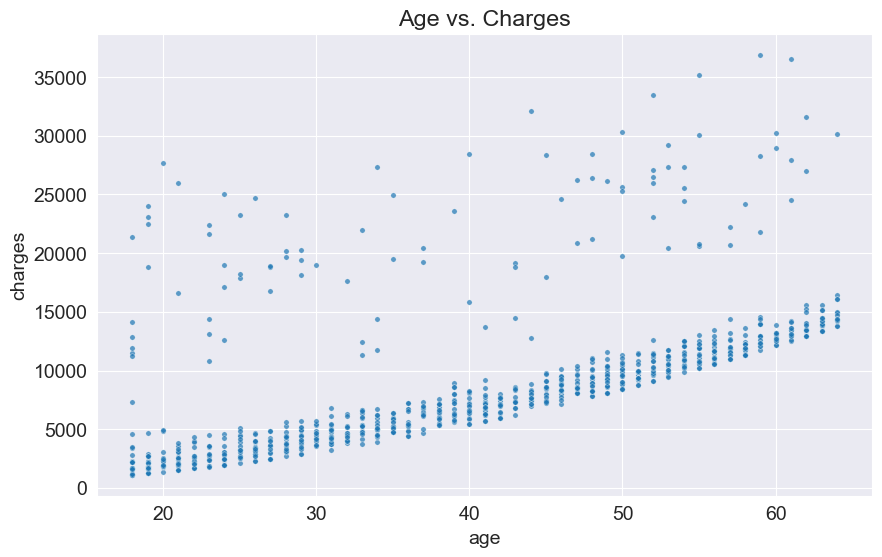

In [152]:
non_smoker_df = medical_df[medical_df.smoker == "no"]
plt.title("Age vs. Charges")
sns.scatterplot(data=non_smoker_df, x="age", y="charges", alpha=0.7, s=15)

In [153]:
def estimate_charges(age, w, b):
    return b + w * age

In [154]:
import numpy as np


def rmse(actual, predicted):
    return np.sqrt(np.mean(np.square(actual - predicted)))

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
inputs, targets = non_smoker_df[["age"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

4662.505766636395

In [157]:
inputs, targets = non_smoker_df[["age", "bmi"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

4662.3128354612945

In [158]:
inputs, targets = non_smoker_df[["age", "children", "bmi"]], non_smoker_df["charges"]
model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

4608.470405038247

<Axes: xlabel='smoker', ylabel='charges'>

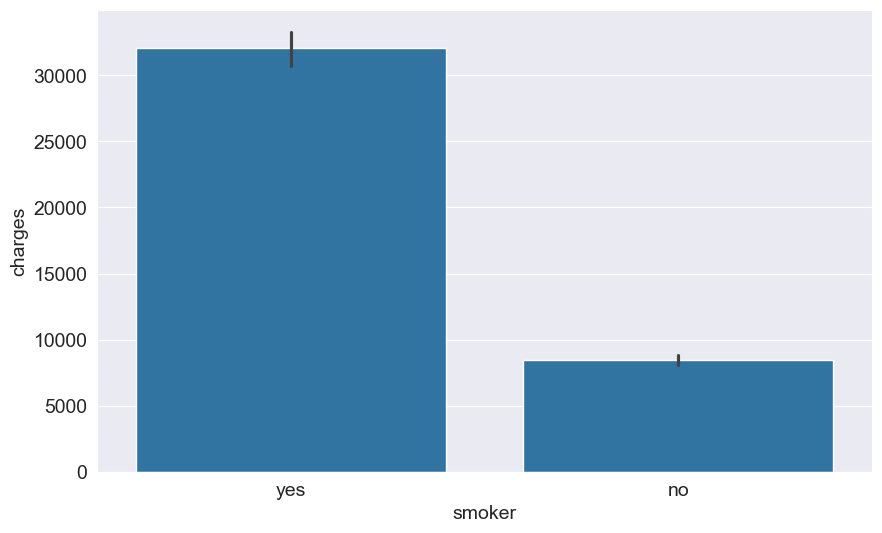

In [159]:
# Binary Categories

sns.barplot(data=medical_df, x="smoker", y="charges")

In [160]:
smoker_codes = {"no": 0, "yes": 1}
medical_df["smoker_codes"] = medical_df.smoker.map(smoker_codes)
medical_df.charges.corr(medical_df.smoker_code)

AttributeError: 'DataFrame' object has no attribute 'smoker_code'

In [ ]:
inputs, targets = (
    medical_df[["age", "bmi", "children", "smoker_codes"]],
    medical_df["charges"],
)
model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

6056.439217188081

In [175]:
sex_codes = {"female": 0, "male": 1}
medical_df["sex_codes"] = medical_df.sex.map(sex_codes)
medical_df.charges.corr(medical_df.sex_codes)

0.05729206220202533

In [ ]:
inputs, targets = (
    medical_df[["age", "bmi", "children", "smoker_code", "sex_codes"]],
    medical_df["charges"],
)
model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

6056.100708754546

<Axes: xlabel='region', ylabel='charges'>

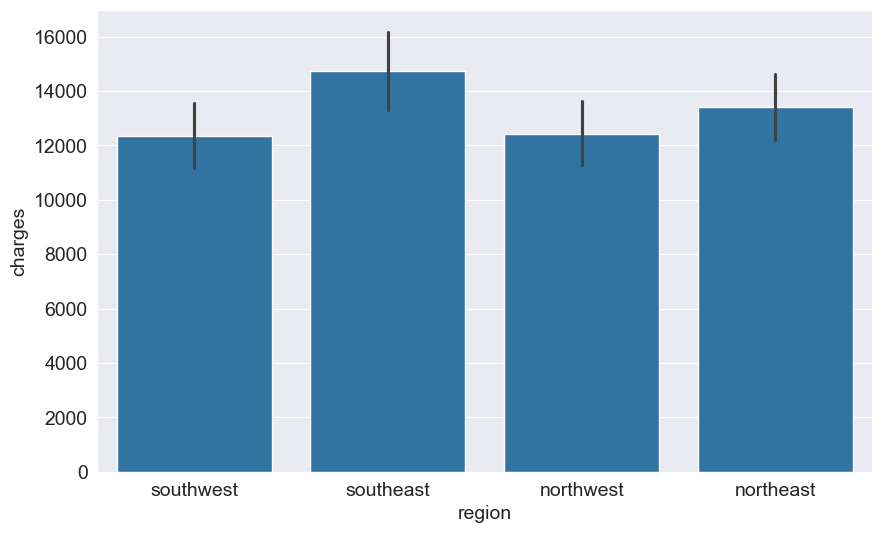

In [ ]:
# Multiple Categories

sns.barplot(data=medical_df, x="region", y="charges")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(medical_df[["region"]])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot = enc.transform(medical_df[["region"]]).toarray()
one_hot, one_hot.shape

(array([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]]),
 (1338, 4))

In [172]:
medical_df[["northeast", "northwest", "southeast", "southwest"]] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_codes,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
input_cols = [
    "age",
    "bmi",
    "children",
    "smoker_codes",
    "sex_codes",
    "northeast",
    "northwest",
    "southeast",
    "southwest",
]
inputs, targets = medical_df[input_cols], medical_df["charges"]
model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

6041.6796511744515

In [ ]:
model.coef_, model.intercept_

(array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
         -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
         -373.04175627]),
 -12525.547811195484)

In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ["age", "bmi", "children"]
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [ ]:
scaler.mean_, scaler.var_

(array([39.20702541, 30.66339686,  1.09491779]),
 array([197.25385199,  37.16008997,   1.45212664]))

In [ ]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [176]:
cat_cols = [
    "smoker_codes",
    "sex_codes",
    "northeast",
    "northwest",
    "southeast",
    "southwest",
]
categorical_data = medical_df[cat_cols]

In [178]:
inputs = np.concatenate([scaled_inputs, categorical_data], axis=1)
targets = medical_df["charges"]

model = LinearRegression().fit(inputs, targets)
preds = model.predict(inputs)
loss = rmse(targets, preds)
loss

6041.6796511744515